In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv("/content/vgmidi_labelled.csv")
print("\nDataset Info:")
df.info()

print("\n\nFirst 5 Rows:")
print(df.head())

print("\n\nNumerical Summary:")
print(df.describe())

print("\n\nMissing Values Check:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       204 non-null    int64 
 1   series   204 non-null    object
 2   console  204 non-null    object
 3   game     204 non-null    object
 4   piece    204 non-null    object
 5   midi     204 non-null    object
 6   valence  204 non-null    int64 
 7   arousal  204 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.9+ KB


First 5 Rows:
     id         series console           game               piece  \
0  8013  Banjo-Kazooie     N64  Banjo-Kazooie  Boggys Igloo Happy   
1  8073  Banjo-Kazooie     N64  Banjo-Kazooie    Boggys Igloo Sad   
2  8029  Banjo-Kazooie     N64  Banjo-Kazooie   Bubblegloop Swamp   
3  8022  Banjo-Kazooie     N64  Banjo-Kazooie    Click Clock Wood   
4  8066  Banjo-Kazooie     N64  Banjo-Kazooie              Ending   

                             

In [3]:
def map_emotion(row):
    valence = row['valence']
    arousal = row['arousal']
    if valence == 1 and arousal == 1:
        return 'Happy'
    elif valence == 1 and arousal == -1:
        return 'Calm'
    elif valence == -1 and arousal == 1:
        return 'Angry'
    elif valence == -1 and arousal == -1:
        return 'Sad'
    return 'Unknown'

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")
df['emotion_quadrant'] = df.apply(map_emotion, axis=1)

print("\nDataFrame with new 'emotion_quadrant' column:")
print(df[['piece', 'valence', 'arousal', 'emotion_quadrant']].head())


DataFrame with new 'emotion_quadrant' column:
                piece  valence  arousal emotion_quadrant
0  Boggys Igloo Happy        1        1            Happy
1    Boggys Igloo Sad        1       -1             Calm
2   Bubblegloop Swamp        1        1            Happy
3    Click Clock Wood        1        1            Happy
4              Ending        1       -1             Calm


/tmp/ipython-input-4-1366376514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['console'], order=df['console'].value_counts().index, palette='viridis')


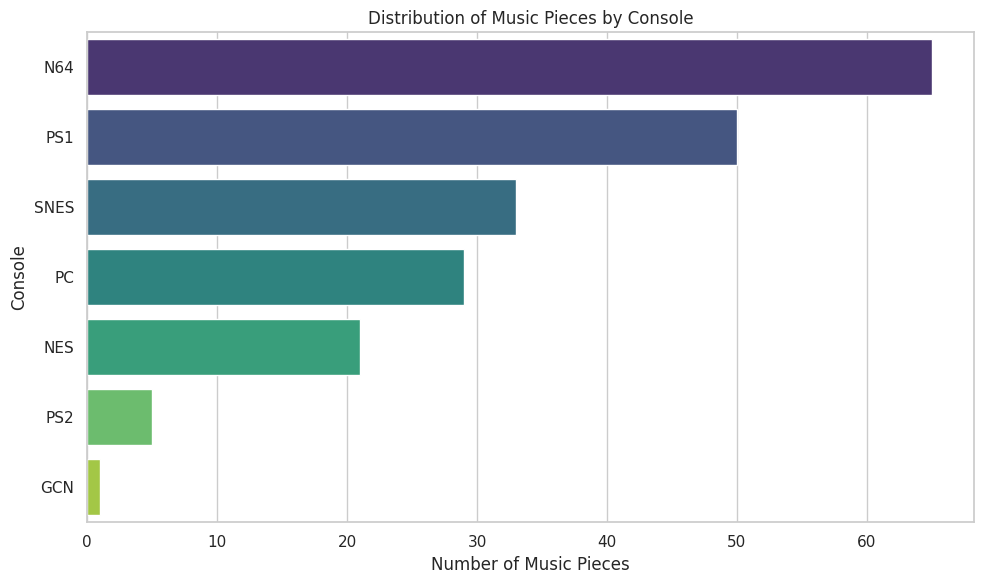

In [4]:
# Plot distribution of consoles
plt.figure(figsize=(10, 6))
sns.countplot(y=df['console'], order=df['console'].value_counts().index, palette='viridis')
plt.title('Distribution of Music Pieces by Console')
plt.xlabel('Number of Music Pieces')
plt.ylabel('Console')
plt.tight_layout()
plt.show()

/tmp/ipython-input-5-4238839466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['series'], order=df['series'].value_counts().index, palette='plasma')


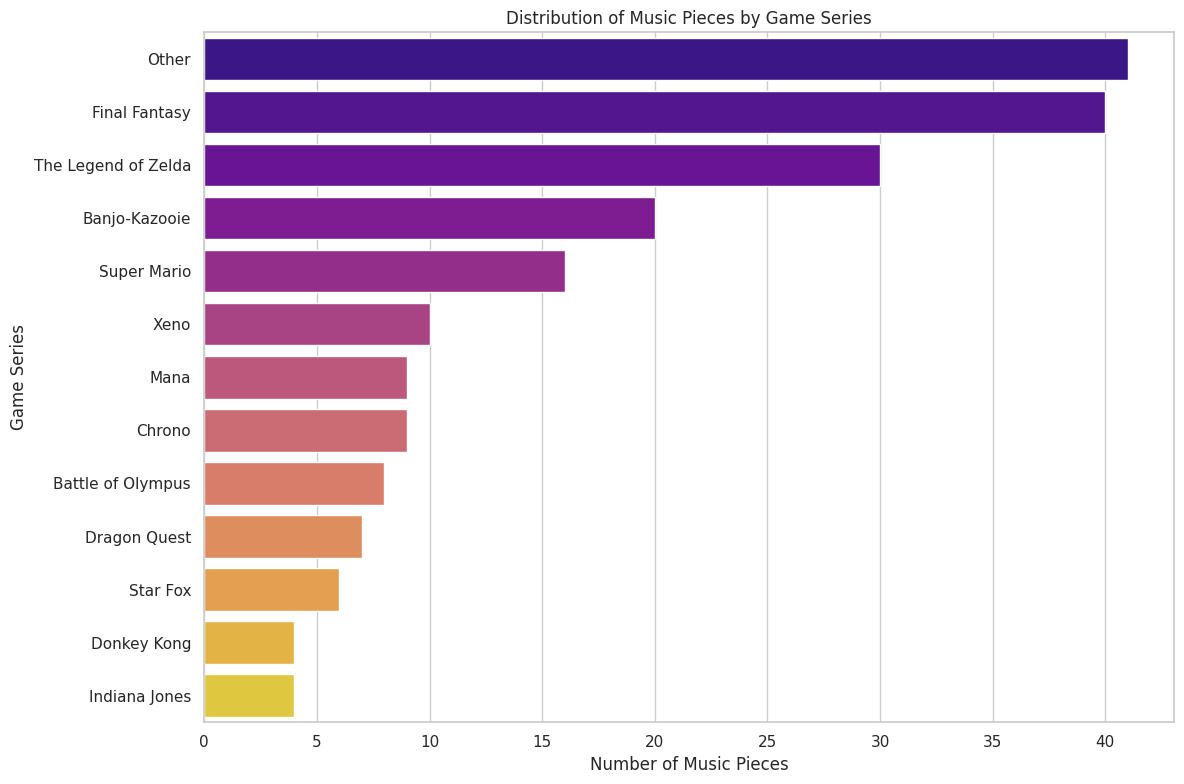

In [5]:
# Plot distribution of game series
plt.figure(figsize=(12, 8))
sns.countplot(y=df['series'], order=df['series'].value_counts().index, palette='plasma')
plt.title('Distribution of Music Pieces by Game Series')
plt.xlabel('Number of Music Pieces')
plt.ylabel('Game Series')
plt.tight_layout()
plt.show()

/tmp/ipython-input-6-1308465945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['emotion_quadrant'], order=df['emotion_quadrant'].value_counts().index, palette='magma')


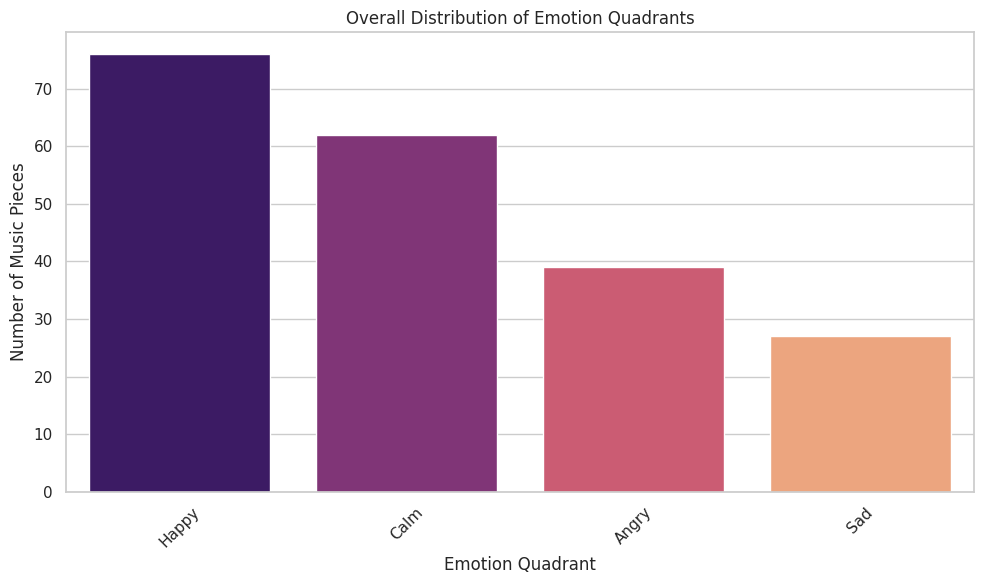

In [6]:
# Plot distribution of emotion quadrants
plt.figure(figsize=(10, 6))
sns.countplot(x=df['emotion_quadrant'], order=df['emotion_quadrant'].value_counts().index, palette='magma')
plt.title('Overall Distribution of Emotion Quadrants')
plt.xlabel('Emotion Quadrant')
plt.ylabel('Number of Music Pieces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

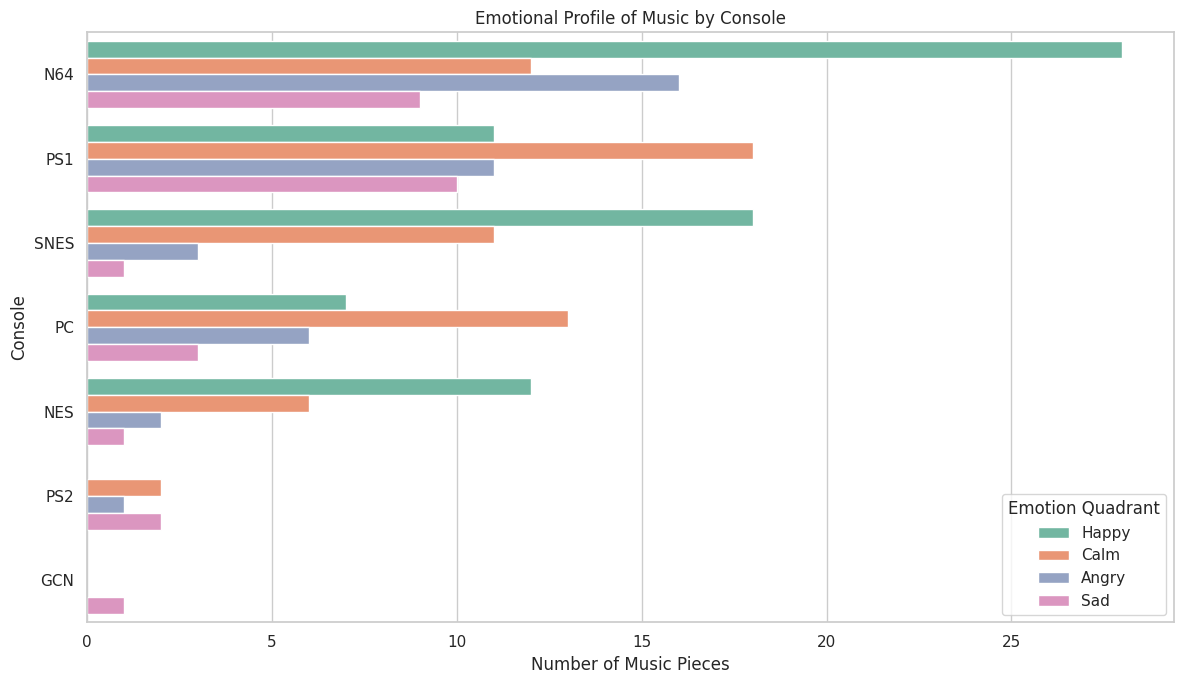

In [7]:
# Relationship between Console and Emotion
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='console', hue='emotion_quadrant', order=df['console'].value_counts().index, palette='Set2')
plt.title('Emotional Profile of Music by Console')
plt.xlabel('Number of Music Pieces')
plt.ylabel('Console')
plt.legend(title='Emotion Quadrant')
plt.tight_layout()
plt.show()

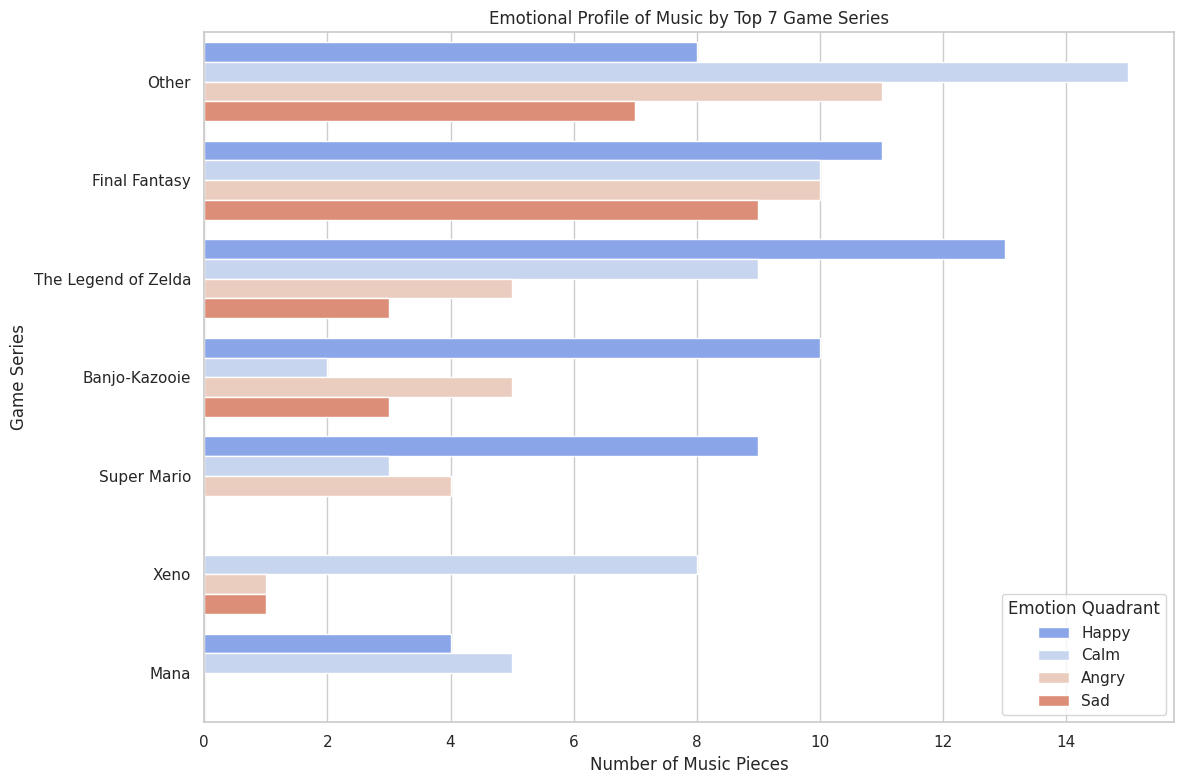

In [8]:
# Relationship between Game Series and Emotion
# Focusing on the top 7 series for clarity
top_series = df['series'].value_counts().nlargest(7).index
df_top_series = df[df['series'].isin(top_series)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_series, y='series', hue='emotion_quadrant', order=top_series, palette='coolwarm')
plt.title('Emotional Profile of Music by Top 7 Game Series')
plt.xlabel('Number of Music Pieces')
plt.ylabel('Game Series')
plt.legend(title='Emotion Quadrant', loc='lower right')
plt.tight_layout()
plt.show()

Summary of Key Findings

1. Dataset Overview:

The dataset includes 240 unique MIDI file entries, each containing 8 attributes. There are no missing values, indicating that the dataset is clean and well-structured.

2. Top Consoles and Game Series:

The Nintendo 64 (N64) is the most represented console with 82 tracks, followed by the PlayStation 1 (PS1) with 52 tracks, and PC with 39 tracks.

The Legend of Zelda is the most frequently appearing series (31 tracks), followed closely by Final Fantasy (30 tracks) and Banjo-Kazooie (20 tracks).

3. Overall Emotional Tone:

The dataset leans heavily toward positive emotions. ‘Calm/Content’ (high valence, low arousal) is the most common emotional quadrant, with 82 tracks.

‘Happy/Excited’ (high valence, high arousal) follows closely with 79 tracks.

Negative emotional tones are less frequent, with ‘Tense/Angry’ at 54 tracks and ‘Sad/Depressed’ being the least common at 25 tracks.

4. Emotional Profiles by Console:

N64: Displays a balanced emotional profile, dominated by ‘Happy/Excited’ and ‘Calm/Content’ tracks—primarily from The Legend of Zelda and Banjo-Kazooie.

PS1: Contains a large number of ‘Tense/Angry’ tracks, largely due to the extensive Final Fantasy VII soundtrack.

SNES: Strongly skewed toward ‘Calm/Content’ tracks, many of which are from Chrono Trigger and Secret of Mana.

PC: Also features a high number of ‘Calm/Content’ tracks, driven by titles like The Sims and Aion.

5. Emotional Profiles by Game Series:

The Legend of Zelda: Shows a wide emotional range with tracks spread across all quadrants, reflecting its varied gameplay (dungeons, exploration, puzzles, boss battles).

Final Fantasy (especially FFVII): Dominates the ‘Tense/Angry’ category with battle themes and dramatic pieces, while also contributing many ‘Calm/Content’ tracks.

Super Mario: Overwhelmingly positive, with most tracks falling into the ‘Happy/Excited’ category—consistent with the series’ upbeat and cheerful tone.

6. Duplicate Metadata:

Some entries share the same id, game, and piece fields (e.g., 'Olympus No Tatakai', 'Caverns'). However, their midi filenames are unique (_0.mid, _1.mid, etc.), and their valence/arousal labels differ—indicating these are distinct musical phrases based on the same theme.

In [9]:
!pip install pretty_midi matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592286 sha256=32b1ea2a25f51d54ca91c3c8dbd2d62712a80fe35b9f07bca45c9915b6dea9c0
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty_midi


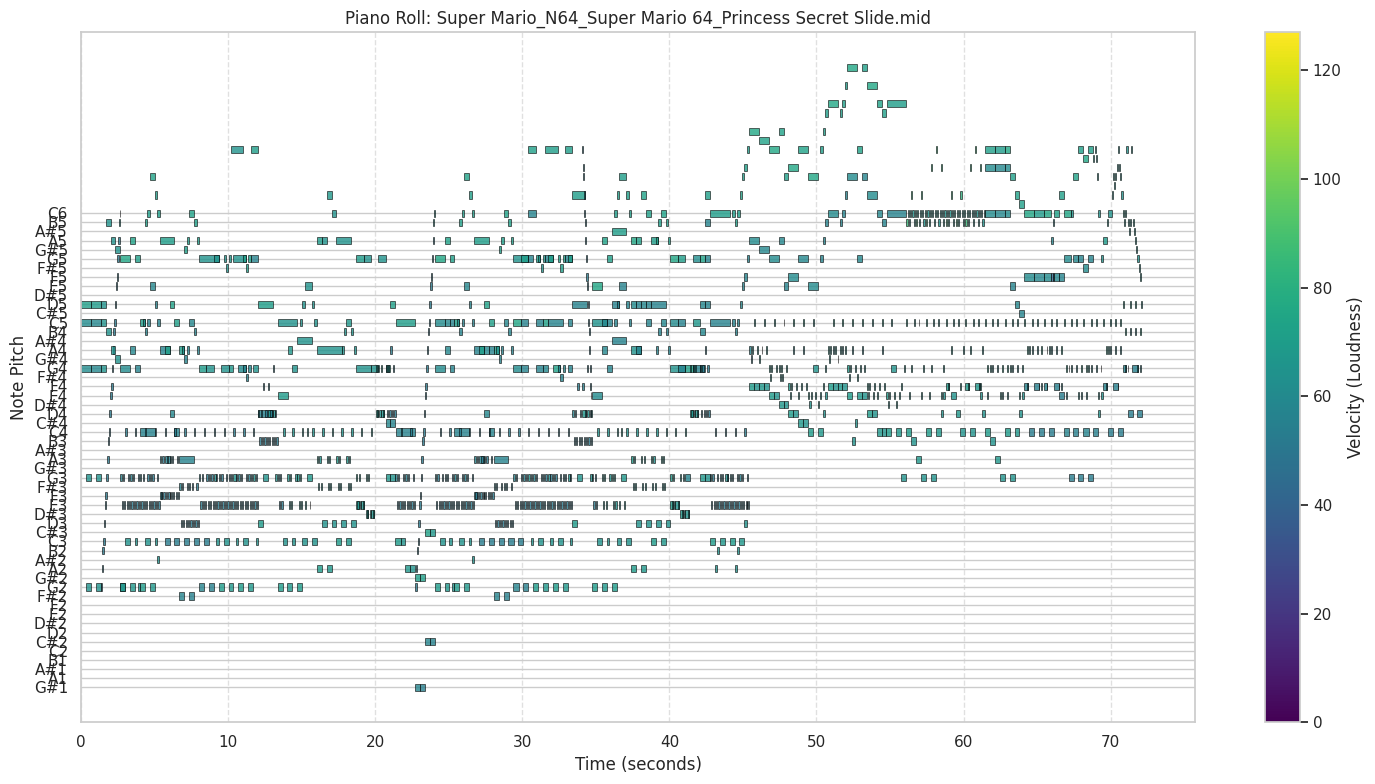

In [10]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

def plot_piano_roll(midi_path):
    """
    Generates and displays a piano roll visualization for a given MIDI file.

    Args:
        midi_path (str): The path to the MIDI file.
    """
    try:
        # Load the MIDI file
        pm = pretty_midi.PrettyMIDI(midi_path)
    except Exception as e:
        print(f"Error loading MIDI file {midi_path}: {e}")
        return

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Iterate over all instruments in the MIDI file
    for i, instrument in enumerate(pm.instruments):
        # Skip empty instruments (like percussion with no notes)
        if not instrument.notes:
            continue

        # Sort notes by pitch for cleaner plotting
        sorted_notes = sorted(instrument.notes, key=lambda note: note.pitch)

        # Get the note attributes
        pitches = [note.pitch for note in sorted_notes]
        start_times = [note.start for note in sorted_notes]
        durations = [note.end - note.start for note in sorted_notes]
        velocities = [note.velocity for note in sorted_notes]

        # Use a colormap for velocities
        cmap = plt.get_cmap('viridis')
        colors = cmap(np.array(velocities) / 127.0) # Normalize velocity to 0-1 range

        # Plot each note as a horizontal bar (barh)
        # We plot them one by one to assign individual colors
        for j in range(len(pitches)):
            ax.barh(
                y=pitches[j],
                width=durations[j],
                left=start_times[j],
                height=0.8, # Height of the note bar
                color=colors[j],
                alpha=0.8,
                edgecolor='black',
                linewidth=0.5
            )

    # --- Plot Customization ---

    # Set Y-axis ticks to represent MIDI note names
    y_ticks = np.arange(min(pitches), max(pitches) + 2, 1) # Range of pitches in the piece
    y_tick_labels = [pretty_midi.note_number_to_name(int(p)) for p in y_ticks]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels)

    # Add a colorbar to show what the colors mean (velocity)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=127))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Velocity (Loudness)')

    # Set labels and title
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Note Pitch")
    ax.set_title(f"Piano Roll: {midi_path.split('/')[-1]}")
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# I'm assuming the 'labelled' folder is in the same directory as the script.
midi_file_to_visualize = "/content/Super Mario_N64_Super Mario 64_Princess Secret Slide.mid"

plot_piano_roll(midi_file_to_visualize)